# Анализ базы данных онлайн-библиотеки

<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Цели-исследования" data-toc-modified-id="Цели-исследования-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Цели исследования</a></span></li><li><span><a href="#Обзор-данных" data-toc-modified-id="Обзор-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обзор данных</a></span></li><li><span><a href="#Задание-1" data-toc-modified-id="Задание-1-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Задание 1</a></span><ul class="toc-item"><li><span><a href="#Запрос" data-toc-modified-id="Запрос-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Запрос</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Результат</a></span></li></ul></li><li><span><a href="#Задание-2" data-toc-modified-id="Задание-2-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Задание 2</a></span><ul class="toc-item"><li><span><a href="#Запрос" data-toc-modified-id="Запрос-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Запрос</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Результат</a></span></li></ul></li><li><span><a href="#Задание-3" data-toc-modified-id="Задание-3-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Задание 3</a></span><ul class="toc-item"><li><span><a href="#Запрос" data-toc-modified-id="Запрос-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Запрос</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>Результат</a></span></li></ul></li><li><span><a href="#Задание-4" data-toc-modified-id="Задание-4-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Задание 4</a></span><ul class="toc-item"><li><span><a href="#Запрос" data-toc-modified-id="Запрос-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Запрос</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-6.2"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>Результат</a></span></li></ul></li><li><span><a href="#Задание-5" data-toc-modified-id="Задание-5-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Задание 5</a></span><ul class="toc-item"><li><span><a href="#Запрос" data-toc-modified-id="Запрос-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Запрос</a></span></li><li><span><a href="#Результат" data-toc-modified-id="Результат-7.2"><span class="toc-item-num">7.2&nbsp;&nbsp;</span>Результат</a></span></li></ul></li></ul></div>

## Цели исследования

Целью данного исследования является первичный анализ базы данных.  
Следует обратить внимание на наполнение, взаимосвязи и количество записей.  
Это необходимо для понимания общей архитектуры и построения дальнейшей работы по развитию сервиса.

In [1]:
import pandas as pd
from sqlalchemy import create_engine, text
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
# устанавливаем параметры
db_config = {'user': 'praktikum_student', # имя пользователя
'pwd': 'Sdf4$2;d-d30pp', # пароль
'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
'port': 6432, # порт подключения
'db': 'data-analyst-final-project-db'} # название базы данных
connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
db_config['pwd'],
db_config['host'],
db_config['port'],
db_config['db'])
# сохраняем коннектор
engine = create_engine(connection_string, connect_args={'sslmode':'require'})

In [3]:
def q (query):
    df = pd.read_sql_query(sql=text(query), con=engine.connect())
    return df

## Обзор данных

In [4]:
books_head = q('''
select *
from books
limit 5
''')

books_head

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


In [20]:
books_count = q('''
select count(*)
from books
''')

books_count

,count
0,1000


**Таблица `books`**

Содержит данные о книгах:

- `book_id` — идентификатор книги;
- `author_id` — идентификатор автора;
- `title` — название книги;
- `num_pages` — количество страниц;
- `title` — название книги;
- `num_pages` — количество страниц;

In [29]:
authors_head = q('''
select *
from authors
limit 5
''')

authors_head

,author_id,author
0,1,A.S. Byatt
1,2,Aesop/Laura Harris/Laura Gibbs
2,3,Agatha Christie
3,4,Alan Brennert
4,5,Alan Moore/David Lloyd


In [30]:
authors_count = q('''
select count(*)
from authors
''')

authors_count

,count
0,636


**Таблица `authors`**

Содержит данные об авторах:

- `author_id` — идентификатор автора;
- `author` — имя автора.

In [27]:
publishers_head = q('''
select *
from publishers
limit 5
''')

publishers_head

,publisher_id,publisher
0,1,Ace
1,2,Ace Book
2,3,Ace Books
3,4,Ace Hardcover
4,5,Addison Wesley Publishing Company


In [28]:
publishers_count = q('''
select count(*)
from publishers
''')

publishers_count

,count
0,340


**Таблица `publishers`**

Содержит данные об издательствах:

- `publisher_id` — идентификатор издательства;
- `publisher` — название издательства.

In [31]:
ratings_head = q('''
select *
from ratings
limit 5
''')

ratings_head

,rating_id,book_id,username,rating
0,1,1,ryanfranco,4
1,2,1,grantpatricia,2
2,3,1,brandtandrea,5
3,4,2,lorichen,3
4,5,2,mariokeller,2


In [32]:
ratings_count = q('''
select count(*)
from ratings
''')

ratings_count

,count
0,6456


**Таблица `ratings`**

Содержит данные о пользовательских оценках книг:

- `rating_id` — идентификатор оценки;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, оставившего оценку;
- `rating` — оценка книги.

In [33]:
reviews_head = q('''
select *
from reviews
limit 5
''')

reviews_head

,review_id,book_id,username,text
0,1,1,brandtandrea,Mention society tell send professor analysis. ...
1,2,1,ryanfranco,Foot glass pretty audience hit themselves. Amo...
2,3,2,lorichen,Listen treat keep worry. Miss husband tax but ...
3,4,3,johnsonamanda,Finally month interesting blue could nature cu...
4,5,3,scotttamara,Nation purpose heavy give wait song will. List...


In [34]:
reviews_count = q('''
select count(*)
from reviews
''')

reviews_count

,count
0,2793


**Таблица `reviews`**

Содержит данные о пользовательских обзорах на книги:

- `review_id` — идентификатор обзора;
- `book_id` — идентификатор книги;
- `username` — имя пользователя, написавшего обзор;
- `text` — текст обзора.

Всего в базе данных представлена информация о `1000` книг, написанных `636` авторами и выпущенных `340` издательствами.  
В совокупности книгам было поставлено `6456` оценок и написано `2793` рецензии.

Взаимосвязь данных выполняется согласно схеме:

![](https://concrete-web-bad.notion.site/image/https%3A%2F%2Fs3-us-west-2.amazonaws.com%2Fsecure.notion-static.com%2F069818d1-0e5c-4d87-a461-0de584ab9c33%2FUntitled_(33).png?id=bd53c8db-b4fd-49eb-8cc9-572ebb3c9163&table=block&spaceId=9e4bd47b-c6e6-4ca3-bcee-279794b47315&width=1640&userId=&cache=v2)

## Задание 1

Посчитать, сколько книг вышло после 1 января 2000 года;

### Запрос

In [10]:
df1 = q('''
select count(*)
from books 
where extract(year from publication_date) >= 2000
''')

df1

,count
0,821


In [11]:
df1_2 = q('''
select *
from books 
where extract(year from publication_date) >= 2000
''')

In [12]:
df1_2.head()

,book_id,author_id,title,num_pages,publication_date,publisher_id
0,1,546,'Salem's Lot,594,2005-11-01,93
1,2,465,1 000 Places to See Before You Die,992,2003-05-22,336
2,3,407,13 Little Blue Envelopes (Little Blue Envelope...,322,2010-12-21,135
3,4,82,1491: New Revelations of the Americas Before C...,541,2006-10-10,309
4,5,125,1776,386,2006-07-04,268


### Результат

Начиная с 1го января 2000 года была выпущена 821 книга

## Задание 2

Для каждой книги посчитать количество обзоров и среднюю оценку

### Запрос

In [62]:
df2 = q('''
with rv as (
select 
book_id 
, count(review_id) reviews_count
from reviews
group by book_id
),
rt as(
select 
book_id
, round(avg(rating), 2) mean_rating
from ratings
group by book_id
)
select 
b.book_id
, title
, reviews_count
, mean_rating
from books b
left join rv on b.book_id = rv.book_id 
left join rt on b.book_id = rt.book_id 
''')

df2['reviews_count'] = df2_3['reviews_count'].fillna(0).astype('int')

df2

,book_id,title,reviews_count,mean_rating
0,652,The Body in the Library (Miss Marple #3),2,4.50
1,273,Galápagos,2,4.50
2,51,A Tree Grows in Brooklyn,5,4.25
3,951,Undaunted Courage: The Pioneering First Missio...,2,4.00
4,839,The Prophet,4,4.29
...,...,...,...,...
995,672,The Cat in the Hat and Other Dr. Seuss Favorites,0,5.00
996,83,Anne Rice's The Vampire Lestat: A Graphic Novel,0,3.67
997,221,Essential Tales and Poems,0,4.00
998,387,Leonardo's Notebooks,0,4.00


### Результат

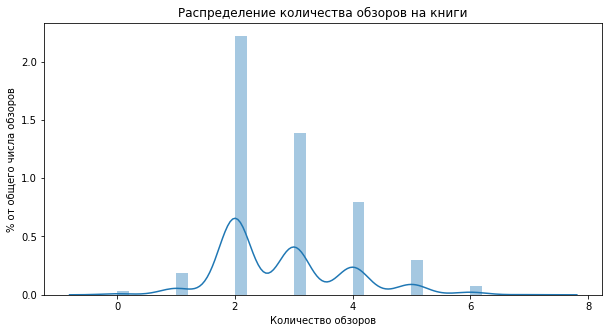

In [64]:
plt.figure(figsize=(10, 5))

sns.distplot(df2['reviews_count'])

plt.title('Распределение количества обзоров на книги')
plt.ylabel('% от общего числа обзоров')
plt.xlabel('Количество обзоров');

In [ ]:
plt.figure(figsize=(10, 5))

sns.distplot(df2['mean_rating'])

plt.title('Распределение среднего рейтинга книг')
plt.ylabel('% от общего числа оценок')
plt.xlabel('Рейтинг');

На графиках показано распределение количества обзоров и пользовательских оценок.

## Задание 3

Определить издательство, которое выпустило наибольшее число книг толще 50 страниц

### Запрос

In [15]:
df3 = q('''
select 
p.publisher_id
, publisher
, count(book_id) books_published
from books b
left join publishers p on b.publisher_id = p.publisher_id
where num_pages > 50
group by 
p.publisher_id
, publisher
order by books_published desc
''')

df3

,publisher_id,publisher,books_published
0,212,Penguin Books,42
1,309,Vintage,31
2,116,Grand Central Publishing,25
3,217,Penguin Classics,24
4,33,Ballantine Books,19
...,...,...,...
329,34,Ballantine Books (NY),1
330,225,Plaza y Janés,1
331,138,HarperCollinsPublishers,1
332,245,Random House: Modern Library,1


### Результат

Больше всего книг (42 шт.) выпустило издательство `Penguin Books`.

## Задание 4

Определить автора с самой высокой средней оценкой книг (учитывать только книги с 50 и более оценками)

### Запрос

In [16]:
df4 = q('''
with books_rating as 
(
select 
b.book_id
, b.title
, a.author_id
, a.author
, count(rating) scores_count
, avg(rating) mean_book_rating
from books b
left join authors a on b.author_id = a.author_id
left join ratings rt on b.book_id = rt.book_id 
group by 
b.book_id
, b.title
, a.author_id
, a.author
having count(rating) >= 50
)
select
author_id
, author
, round(avg(mean_book_rating), 2) mean_author_rating
from books_rating br
group by
author_id
, author
order by mean_author_rating desc
''')

df4

,author_id,author,mean_author_rating
0,236,J.K. Rowling/Mary GrandPré,4.28
1,240,J.R.R. Tolkien,4.26
2,402,Markus Zusak/Cao Xuân Việt Khương,4.26
3,376,Louisa May Alcott,4.19
4,498,Rick Riordan,4.08
5,621,William Golding,3.90
6,235,J.D. Salinger,3.83
7,469,Paulo Coelho/Alan R. Clarke/Özdemir İnce,3.79
8,630,William Shakespeare/Paul Werstine/Barbara A. M...,3.79
9,106,Dan Brown,3.75


### Результат

Наивысший средний рейтинг `4.28 / 5` имеет `Джоан Роулинг`

## Задание 5

Посчитать среднее количество обзоров от пользователей, которые поставили больше 50 оценок

### Запрос

In [17]:
df5_2 = q('''
with rt as
(
select 
username
, count(rating_id) scores_count
from ratings
group by username 
having count(rating_id) > 50
)
, rv as(
select 
username
, count(review_id) reviews_count
from reviews rv
group by username 
--having count(rating_id) > 50
)
select
round(avg(reviews_count), 2) mean_reviews_count
from rt
join rv on rv.username = rt.username
''')

df5_2

,mean_reviews_count
0,24.33


In [18]:
df5 = q('''
with rt as
(
select 
username
, count(rating_id) scores_count
from ratings
group by username 
having count(rating_id) > 50
)
, rv as(
select 
username
, count(review_id) reviews_count
from reviews rv
group by username 
--having count(rating_id) > 50
)
select
rv.username
, reviews_count
from rt
join rv on rv.username = rt.username
''')

df5

,username,reviews_count
0,sfitzgerald,28
1,jennifermiller,25
2,xdavis,18
3,paul88,22
4,martinadam,27
5,richard89,26


### Результат

Среднее количество обзоров от пользователей с 50-ю и более оценками: 24.3  
Всего таких пользователей 6